# Analysis of Load Profiles per Building

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
# CONFIG

DATA_PATH = "/Volumes/karsten.schroer@uni-koeln.de/Uni/Research/04_CASE_Clustered_EV_Charging/"
OUT_PATH = ""
HOLIDAY_YEARS = [2019, 2020]

Get Data

In [3]:
dateparser = lambda x: datetime.datetime.strptime(x, "%d/%m/%Y %H:%M")
loads_df=pd.read_csv(DATA_PATH+"Building_Load_Profile_Data/Lastgang.csv", parse_dates=True, index_col="Time", sep=",", date_parser=dateparser)

Depending on Facility Load is given in kWh per 15 min, or already converted into kW
- K1,K2,B1,B2,H2,H3,H4,H6: kWh per 15min. Multiply by 4 to get kW
- M1,M2,H1: kW no transformation needed

In [4]:
loads_df.columns

Index(['K1', 'K2', 'H3', 'M1', 'M1p', 'M2', 'B2a', 'B1', 'B2b', 'H1', 'H2',
       'H4', 'H6'],
      dtype='object')

In [5]:
loads_df["timestamp"] = loads_df.index
loads_df["timestamp_hour"] = loads_df["timestamp"].apply(lambda x: x.replace(minute=0,second=0))
loads_df["weekday"] = loads_df["timestamp"].apply(lambda x: x.weekday())
loads_df["month"] = loads_df["timestamp"].apply(lambda x: x.month)
loads_df["hour"] = loads_df["timestamp"].apply(lambda x: x.hour)
loads_df["timestamp_adjust"] = loads_df["timestamp"].apply(lambda x: (x.strftime("%H:%M:%S")))

# Adjust Building Loads which are provided in kWh (K1,K2,B1,B2,H2,H3,H4,H6)
for col in ["K1","K2",'B2a', 'B1', 'B2b',"H2","H3","H4","H6"]:
    loads_df[col] = loads_df[col]*4 # approximation of peak load 
    
loads_df["K1+K2"] = loads_df["K1"]+loads_df["K2"]

loads_df.reset_index(drop=True, inplace=True)

In [9]:
#loads_df

In [7]:
loads_df_hourly = loads_df.groupby("timestamp_hour",as_index=False).max()
loads_df_hourly = loads_df_hourly[['timestamp_hour', 'K1', 'K2', 'H3', 'M1', 'M1p', 'M2', 'B2a', 'B1',
       'B2b', 'H1', 'H2', 'H4', 'H6', 'K1+K2' , 'weekday', 'month', 'hour']]

In [8]:
loads_df_hourly

,timestamp_hour,K1,K2,H3,M1,M1p,M2,B2a,B1,B2b,H1,H2,H4,H6,K1+K2,weekday,month,hour
0,2017-01-01 00:00:00,60.0,85.0,NaN,NaN,NaN,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,6,1,0
1,2017-01-01 01:00:00,60.0,60.0,NaN,NaN,NaN,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,6,1,1
2,2017-01-01 02:00:00,55.0,70.0,NaN,NaN,NaN,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,6,1,2
3,2017-01-01 03:00:00,55.0,70.0,NaN,NaN,NaN,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,6,1,3
4,2017-01-01 04:00:00,55.0,90.0,NaN,NaN,NaN,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,6,1,4
5,2017-01-01 05:00:00,60.0,95.0,NaN,NaN,NaN,13.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,6,1,5
6,2017-01-01 06:00:00,55.0,80.0,NaN,NaN,NaN,13.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,6,1,6
7,2017-01-01 07:00:00,70.0,95.0,NaN,NaN,NaN,15.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,6,1,7
8,2017-01-01 08:00:00,60.0,100.0,NaN,NaN,NaN,14.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,6,1,8
9,2017-01-01 09:00:00,65.0,115.0,NaN,NaN,NaN,13.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0,6,1,9


- Mixed Use Building: M1, K1+K2
- Typical Office Building: B6

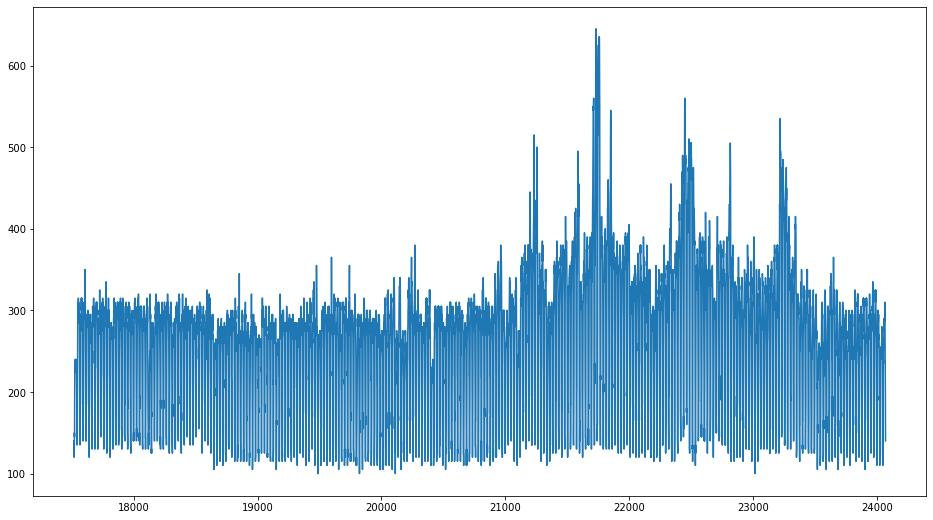

In [121]:
f,ax=plt.subplots(figsize=(16,9))
ax.plot(loads_df_hourly[(loads_df_hourly["timestamp_hour"]>='2019-01-01')&(loads_df_hourly["timestamp_hour"]<='2019-12-31')]["K1+K2"])

In [122]:
#loads_df

<AxesSubplot:xlabel='hour', ylabel='K1+K2'>

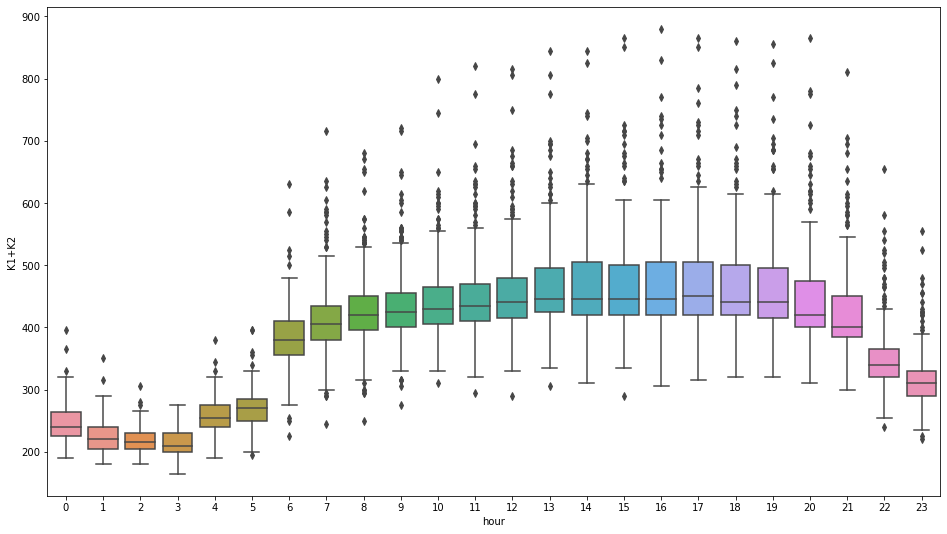

In [127]:
f,ax=plt.subplots(figsize=(16,9))
data = loads_df_hourly[(loads_df_hourly["timestamp_hour"]>='2019-01-01')&(loads_df_hourly["timestamp_hour"]<='2019-12-31')][["weekday","month","hour","timestamp_hour","K1+K2"]]
sns.boxplot(x="hour",y="K1+K2",data=data,ax=ax)

__Produce a month_specific average load curve per each facility__

In [146]:
monthly_avg_load = loads_df_hourly.groupby(["month","hour"],as_index=False).agg({"K1+K2":"mean"})
monthly_avg_load.columns = ['month', 'hour', 'kW']

In [145]:
num_parking_spots = pd.read_csv(DATA_PATH+"Parking_Data/parking_size.csv")
num_parking_spots["ScaleFactor"] = num_parking_spots["NumParkingSpots"]/508 #508 is size of Koebogen

In [152]:
monthly_avg_load.columns

Index(['month', 'hour', 'kW'], dtype='object')

In [172]:
load_per_facility = pd.DataFrame(columns=['month', 'hour', 'kW',"kWScaled","SiteID"])

for site in ['Facility_1', 'Facility_2', 'Facility_3', 'Facility_4','Facility_5', 'Facility_6', 'Facility_KoeBogen']:
    
    data = monthly_avg_load.copy()
    
    data["kWScaled"] = data["kW"]*float(num_parking_spots[num_parking_spots["SiteID"]==site]["ScaleFactor"])
    data["SiteID"] = site
    
    load_per_facility = load_per_facility.append(data)
    

In [178]:
#load_per_facility

<AxesSubplot:xlabel='hour', ylabel='kWScaled'>

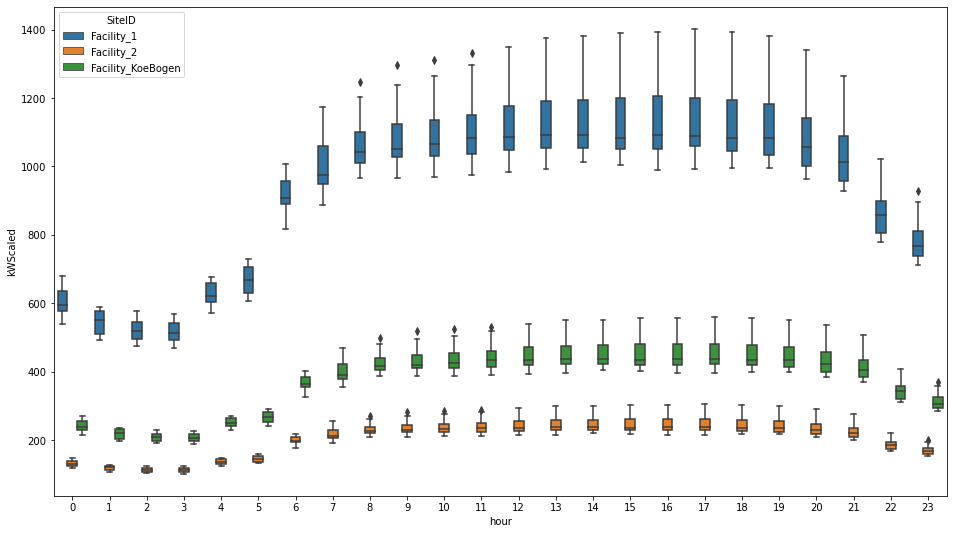

In [177]:
f,ax=plt.subplots(figsize=(16,9))
data = load_per_facility[(load_per_facility["SiteID"].isin(['Facility_1', 'Facility_2','Facility_KoeBogen'])==True)][["hour","kWScaled","SiteID"]]
sns.boxplot(x="hour",y="kWScaled",data=data,hue="SiteID",ax=ax)

In [180]:
load_per_facility.to_csv(DATA_PATH+"Building_Load_Profile_Data/Scaled_Avg_Hourly_Load.csv")

---